<a href="https://colab.research.google.com/github/Bhavya728/Bhavya-UCS420/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q.1 Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).

Convert text to lowercase and remove punctuaƟon using re.
Tokenize the text into words and sentences.
Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.
Remove stopwords (using NLTK's stopwords list).
Display word frequency distribuƟon (excluding stopwords)

In [1]:

import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt_tab')
nltk.download('stopwords')

text = """
Books have always been a gateway to new worlds, offering an escape from the everyday and providing a space for deep reflection.
Whether it's fiction or non-fiction, the written word has a way of drawing readers into its pages, sparking imagination and offering new perspectives.
Reading allows people to experience other cultures, ideas, and emotions, fostering empathy and understanding.
In an age dominated by technology, books still hold a special place, providing a break from the digital noise.
The power of storytelling in books is timeless, and their impact on society is undeniable.
"""
lowered_text = text.lower()
cleaned_text = re.sub(r'[^\w\s]','',lowered_text)
print(cleaned_text)

sent_tokens = sent_tokenize(cleaned_text)
print(sent_tokens)

words_split = cleaned_text.split()
print("using split(): ",words_split)
print()

words_tokens = word_tokenize(cleaned_text)
print("using word_tokenize(): ",words_tokens)
print()

stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words_tokens if word not in stop_words]
word_freq = Counter(filtered_words)
print("Word Frequency Distribution: ")
for word, freq in word_freq.items():
  print(f"{word}: {freq}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



books have always been a gateway to new worlds offering an escape from the everyday and providing a space for deep reflection
whether its fiction or nonfiction the written word has a way of drawing readers into its pages sparking imagination and offering new perspectives
reading allows people to experience other cultures ideas and emotions fostering empathy and understanding
in an age dominated by technology books still hold a special place providing a break from the digital noise
the power of storytelling in books is timeless and their impact on society is undeniable

['\nbooks have always been a gateway to new worlds offering an escape from the everyday and providing a space for deep reflection\nwhether its fiction or nonfiction the written word has a way of drawing readers into its pages sparking imagination and offering new perspectives\nreading allows people to experience other cultures ideas and emotions fostering empathy and understanding\nin an age dominated by technology book

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Q.2 Using the same paragraph from Q1:

Extract all words with only alphabets using re.findall()
Remove stop words using NLTK’s stopword list
Perform stemming with PorterStemmer
Perform lemmaƟzaƟon with WordNetLemmaƟzer
Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over the other

In [2]:

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

alphabet_words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
print(alphabet_words)
print()

filtered = [word for word in words_tokens if word not in stop_words]
print("after removing stopwords: ",filtered)
print()


ps = PorterStemmer()
stemmed = [ps.stem(word) for word in filtered]
print("stemmed: ",stemmed)

lemmatizer=WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
print("lemmatized: ",lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...


['books', 'have', 'always', 'been', 'a', 'gateway', 'to', 'new', 'worlds', 'offering', 'an', 'escape', 'from', 'the', 'everyday', 'and', 'providing', 'a', 'space', 'for', 'deep', 'reflection', 'whether', 'it', 's', 'fiction', 'or', 'non', 'fiction', 'the', 'written', 'word', 'has', 'a', 'way', 'of', 'drawing', 'readers', 'into', 'its', 'pages', 'sparking', 'imagination', 'and', 'offering', 'new', 'perspectives', 'reading', 'allows', 'people', 'to', 'experience', 'other', 'cultures', 'ideas', 'and', 'emotions', 'fostering', 'empathy', 'and', 'understanding', 'in', 'an', 'age', 'dominated', 'by', 'technology', 'books', 'still', 'hold', 'a', 'special', 'place', 'providing', 'a', 'break', 'from', 'the', 'digital', 'noise', 'the', 'power', 'of', 'storytelling', 'in', 'books', 'is', 'timeless', 'and', 'their', 'impact', 'on', 'society', 'is', 'undeniable']

after removing stopwords:  ['books', 'always', 'gateway', 'new', 'worlds', 'offering', 'escape', 'everyday', 'providing', 'space', 'deep

Q.3 Choose 3 short texts of your own (e.g., different news headlines, product reviews).

Use CountVectorizer to generate the Bag of Words representaƟon.
Use TfidfVectorizer to compute TF-IDF scores.
Print and interpret the top 3 keywords from each text using TF-IDF


bag of words:
 [[0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0]
 [1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1]
 [1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0]]

feature names:
 ['and' 'at' 'battery' 'build' 'camera' 'disappointing' 'drains'
 'especially' 'excellent' 'in' 'is' 'life' 'light' 'low' 'outstanding'
 'performance' 'point' 'price' 'quality' 'quickly' 'the' 'this' 'too']

Top 3 words for text 1: ['the', 'especially', 'camera']

Top 3 words for text 2: ['too', 'quickly', 'life']

Top 3 words for text 3: ['this', 'price', 'point']


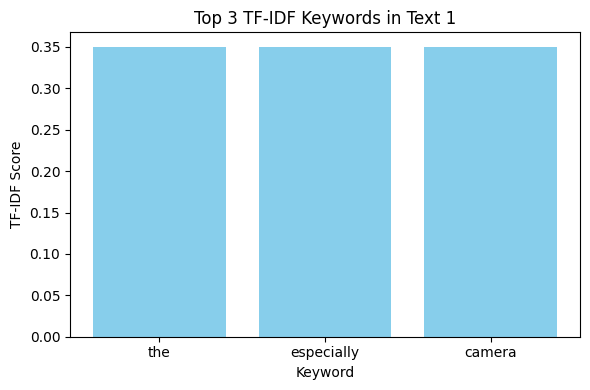

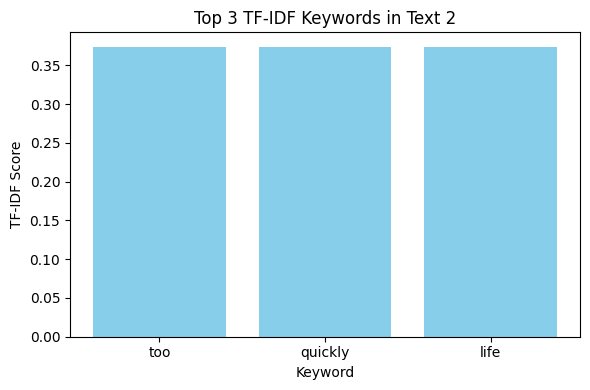

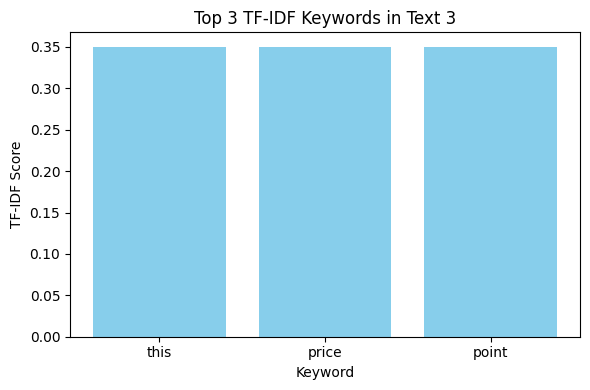

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
texts = [
    "The camera quality is outstanding, especially in low light.",
    "Battery life is disappointing and drains too quickly.",
    "Excellent performance and build quality at this price point."
]
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(texts)
print('\nbag of words:\n',bow.toarray())
print('\nfeature names:\n',vectorizer.get_feature_names_out())

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names_out()

for i,row in enumerate(tfidf_matrix):
    row_array = row.toarray().flatten()
    top_indices = row_array.argsort()[-3:][::-1]
    top_words = [feature_names[idx] for idx in top_indices]
    print(f"\nTop 3 words for text {i+1}: {top_words}")

for i, row in enumerate(tfidf_matrix):
    row_array = row.toarray().flatten()
    top_indices = row_array.argsort()[-3:][::-1]
    top_words = [feature_names[idx] for idx in top_indices]
    top_scores = [row_array[idx] for idx in top_indices]

    plt.figure(figsize=(6, 4))
    plt.bar(top_words, top_scores, color='skyblue')
    plt.title(f"Top 3 TF-IDF Keywords in Text {i+1}")
    plt.ylabel("TF-IDF Score")
    plt.xlabel("Keyword")
    plt.tight_layout()
    plt.show()

Q.4 Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).

Preprocess and tokenize both texts.
Calculate: a. Jaccard Similarity using sets b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
c. Analyze which similarity metric gives beƩer insights in your case.

In [4]:

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text1="""Artificial Intelligence is a type of technology that helps machines think and learn like humans.
It is used in things like voice assistants, facial recognition, and self-driving cars.
AI gets better as it processes more information.
It is already being used in many industries like healthcare and entertainment."""

text2="""Blockchain is a technology that keeps information secure in a digital way.
It is most known for supporting cryptocurrencies like Bitcoin.
Blockchain works by connecting information in "blocks" that are hard to change.
It is used in many areas, such as finance and tracking goods in supply chains."""

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.split()
    return tokens

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

set1 = set(tokens1)
set2 = set(tokens2)
intersection = set1.intersection(set2)
union = set1.union(set2)
jaccard_sim = len(intersection)/len(union)
print("Jaccard Similarity:", jaccard_sim)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([text1,text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1],tfidf_matrix[1:2])
print("Cosine Similarity:", cosine_sim[0][0])

Jaccard Similarity: 0.1875
Cosine Similarity: 0.37510814433426876


Q.5 Write a short review for a product or service.

Use TextBlob or VADER to find polarity & subjecƟvity for each review.
Classify reviews into PosiƟve / NegaƟve / Neutral.
Create a word cloud using the wordcloud library for all posiƟve reviews.

Positive
Review :I recently purchased the new SmartPhone, and I am beyond impressed with its performance.
Subjectivity:0.5681818181818182
Positive
Review :It freezes constantly, and the battery drains too quickly.
Subjectivity:0.41666666666666663
Positive
Review :It works fine, but nothing exceptional.
Subjectivity:0.75


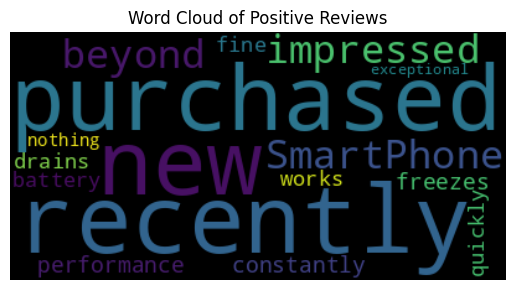

In [5]:

from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "I recently purchased the new SmartPhone, and I am beyond impressed with its performance.",
    "It freezes constantly, and the battery drains too quickly.",
    "It works fine, but nothing exceptional."
]
for review in reviews:
  blob=TextBlob(review)
  polarity=blob.sentiment.polarity;
  subjectivity=blob.sentiment.subjectivity
  if(polarity>0):
      print("Positive")
  elif(polarity<0):
      print("Negative")
  else:
      print("Neutral")

  print(f"Review :{review}")
  print(f"Subjectivity:{subjectivity}")

positive_reviews = " ".join([r for r in reviews if TextBlob(r).sentiment.polarity>0])
wordcloud=WordCloud().generate(positive_reviews)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()


Q6. Choose your own paragraph (~100 words) as training data.

Tokenize text using Tokenizer() from keras.preprocessing.text
Create input sequences and build a simple LSTM or Dense model
Train the model and generate 2–3 new lines of text starƟng from any seed word you provide.

In [6]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

paragraph="""Technology has become an integral part of modern life, transforming how we communicate, work, and solve problems.
From smartphones to artificial intelligence, it continues to reshape industries and daily routines.
Innovations in healthcare, education, and transportation have improved the quality of life and increased accessibility to vital resources.
Social media platforms connect people globally, while cloud computing and data analytics drive smarter business decisions.
Although technology brings many advantages, it also raises concerns about privacy, cybersecurity, and job displacement.
Balancing its benefits and risks is essential as society grows more reliant on digital solutions. Overall, technology remains a powerful force for change."""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

input_sequences =[]
for line in paragraph.split("."):
  tokens = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(tokens)):
    seq = tokens[:i+1]
    input_sequences.append(seq)

max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen = max_seq_len, padding='pre')

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = np.zeros((len(labels),total_words))
for i, label in enumerate(labels):
  ys[i, label] = 1

model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xs, ys, epochs=200, verbose=0)

def generate_text(seed_text, next_words=10):
  for _ in range(next_words):
      token_list = tokenizer.texts_to_sequences([seed_text])[0]
      token_list = pad_sequences([token_list], maxlen= max_seq_len-1, padding ='pre')
      predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
      output_word = ''
      for word, index in tokenizer.word_index.items():
          if index ==predicted:
              output_word =word
              break
      seed_text+= " " + output_word
  return seed_text

print(generate_text("technology",10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


technology technology technology and part part of modern life transforming how
